In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
%run '/Users/katya/MSc/ADS/ubird/spectraparser.py'

In [2]:
by_aa = pd.read_table('/Users/katya/MSc/ADS/GFP/amino_acid_genotypes_to_brightness.tsv')
by_aa.aaMutations.fillna('', inplace=True)
unique_mutations = set(':'.join(by_aa.aaMutations.values).split(':'))
unique_mutations.remove('')
positions = [int(m[2:-1]) for m in unique_mutations if m != '']

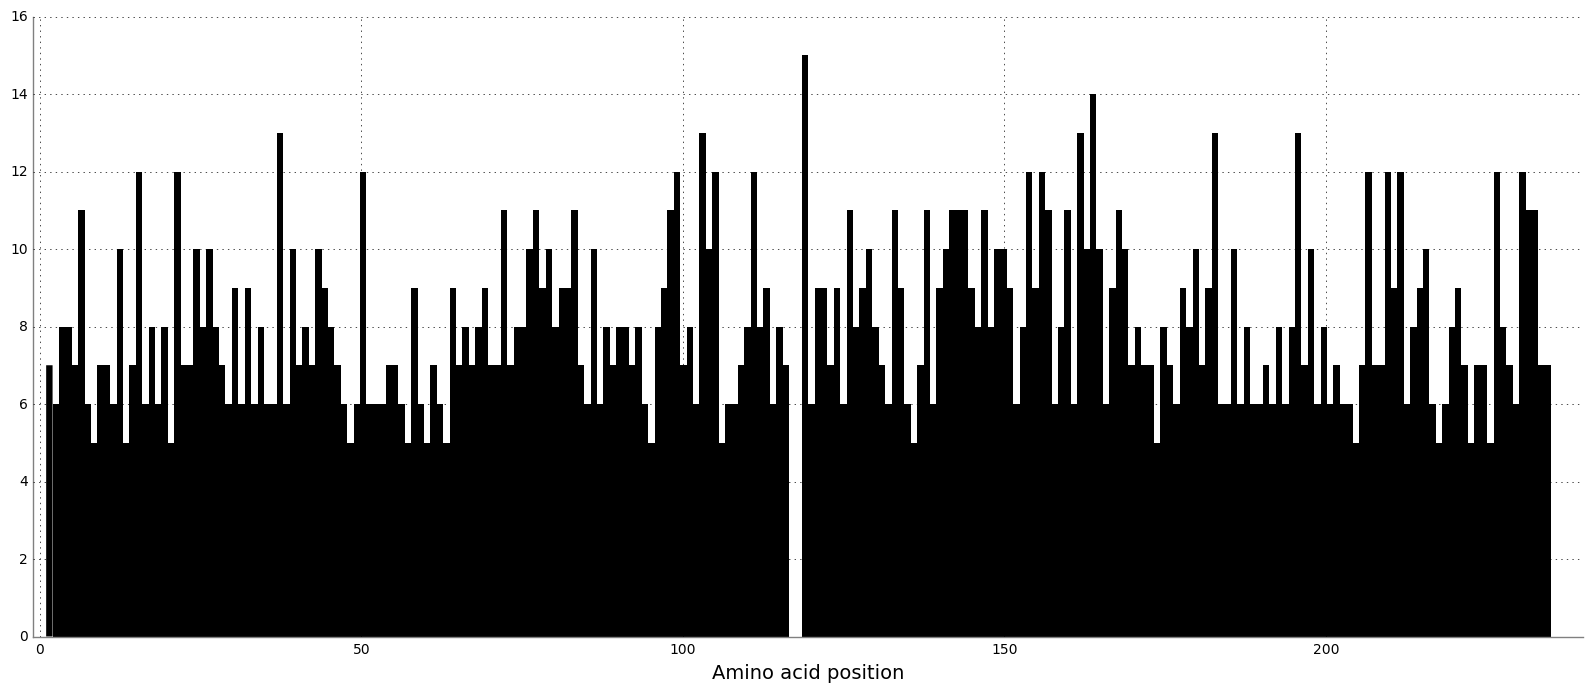

In [3]:
plot_better(width=20, height=8)
plt.hist(positions, bins=max(positions), edgecolor='none', color='black');
plt.xlim(-1, 240)
plt.xlabel('Amino acid position', fontsize=14);

In [4]:
aa = list("ACDEFGHIKLMNPQRSTVWYX*")
aa2aa = pd.DataFrame(columns=aa, index=aa).fillna(0)
for m in unique_mutations:
    aa2aa[m[-1]].ix[m[1]] += 1

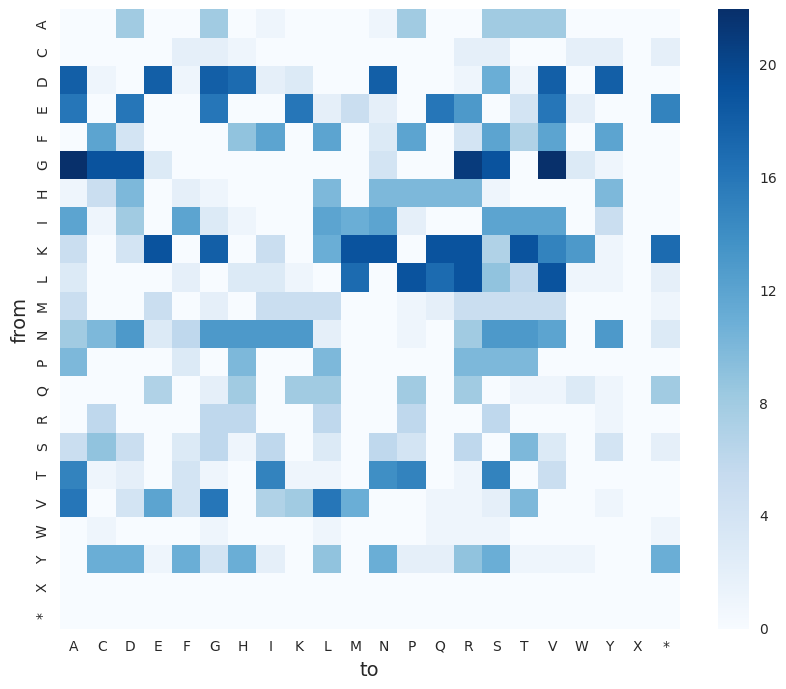

In [5]:
import seaborn as sns
plt.figure(figsize = [10,8])
sns.heatmap(aa2aa, cmap='Blues')
plt.xlabel('to', fontsize=14)
plt.ylabel('from', fontsize=14);

In [6]:
aa2aa

,A,C,D,E,F,G,H,I,K,L,...,P,Q,R,S,T,V,W,Y,X,*
A,0,0,8,0,0,8,0,1,0,0,...,8,0,0,8,8,8,0,0,0,0
C,0,0,0,0,2,2,1,0,0,0,...,0,0,2,2,0,0,2,2,0,2
D,18,1,0,18,1,18,17,2,3,0,...,0,0,1,11,1,18,0,18,0,0
E,16,0,16,0,0,16,0,0,16,2,...,0,16,13,0,4,16,2,0,0,15
F,0,12,4,0,0,0,9,12,0,12,...,12,0,4,12,7,12,0,12,0,0
G,22,19,19,3,0,0,0,0,0,0,...,0,0,21,19,0,22,3,1,0,0
H,1,5,10,0,2,1,0,0,0,10,...,10,10,10,1,0,0,0,10,0,0
I,12,1,8,0,12,3,1,0,0,12,...,2,0,0,12,12,12,0,5,0,0
K,5,0,4,19,0,18,0,5,0,11,...,0,19,19,7,19,15,13,1,0,17
L,3,0,0,0,2,0,3,3,1,0,...,19,17,19,9,6,19,1,1,0,2


1115
1393


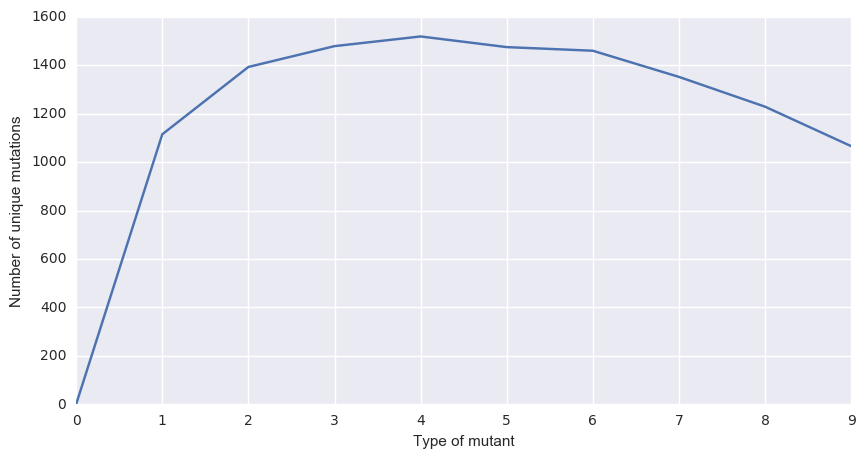

In [8]:
by_aa = pd.read_table('/Users/katya/MSc/ADS/GFP/amino_acid_genotypes_to_brightness.tsv')
by_aa.aaMutations.fillna('', inplace=True)
by_aa['mut_number'] = by_aa.aaMutations.apply(lambda x: x.count(':') + 1)
singles = by_aa[by_aa.mut_number == 1]
doubles = by_aa[by_aa.mut_number == 2]
unique_mutations_in_doubles = set(':'.join(doubles.aaMutations.values).split(':'))
# unique_mutations.remove('')
# positions = [int(m[2:-1]) for m in unique_mutations if m != '']
print len(singles)
print len(unique_mutations_in_doubles)

uniques = []
for i in range(10):
    subset = by_aa[by_aa.mut_number == i]
    uniques.append(len(set(':'.join(subset.aaMutations.values).split(':'))))

plot_better()
plt.plot(range(10), uniques)
plt.xlabel('Type of mutant')
plt.ylabel('Number of unique mutations');